In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [5]:
data = pd.read_csv("banking.txt")

In [6]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
print(data.shape)

(4521, 17)


In [7]:
data.y

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [8]:
data.y.replace(["no","yes"],[0,1],inplace= True)

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [10]:
data.y.sum()

521

In [21]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


In [26]:
data.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [28]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


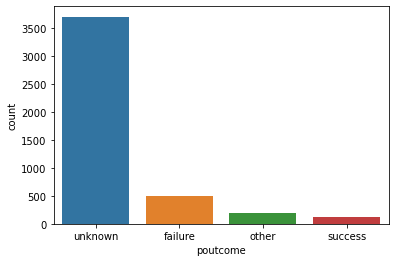

In [11]:
sns.countplot(x= 'poutcome',data = data)
plt.show()

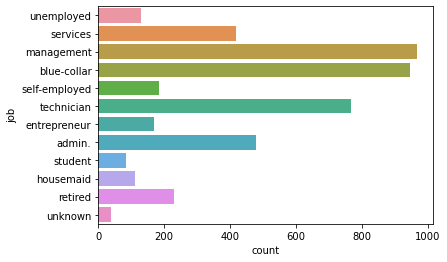

In [34]:
sns.countplot(y = "job", data = data)
plt.show()

In [12]:
nd = data[["job","marital","default","housing","loan","poutcome","y"]]

In [13]:
nd.head(10)

,job,marital,default,housing,loan,poutcome,y
0,unemployed,married,no,no,no,unknown,0
1,services,married,no,yes,yes,failure,0
2,management,single,no,yes,no,failure,0
3,management,married,no,yes,yes,unknown,0
4,blue-collar,married,no,yes,no,unknown,0
5,management,single,no,no,no,failure,0
6,self-employed,married,no,yes,no,other,0
7,technician,married,no,yes,no,unknown,0
8,entrepreneur,married,no,yes,no,unknown,0
9,services,married,no,yes,yes,failure,0


In [14]:
nd2 = pd.get_dummies(nd,columns = ["job","marital","default","housing","loan","poutcome"])

In [15]:
nd2.head(10)

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
5,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0


In [16]:
nd2.drop(nd2.columns[[25]],axis = 1,inplace = True)

In [17]:
nd2.head(5)

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [18]:
nd2.drop(nd2.columns[[23]],axis = 1,inplace= True)

In [19]:
nd2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [20]:
ll = nd2.iloc[:,8:15]

In [21]:
ll.head()

,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married
0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [22]:
nd2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [23]:
nd2.drop("job_unknown", axis = 1, inplace=True)

In [24]:
nd2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [25]:
nd2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')

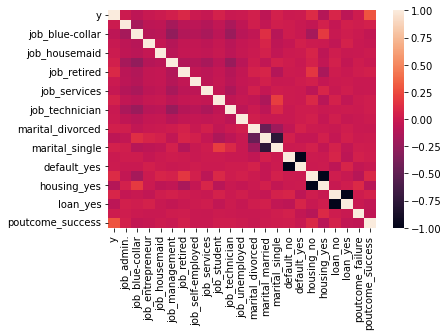

In [26]:
sns.heatmap(nd2.corr())
plt.show()

In [27]:
nd2.corr()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success
y,1.000000,0.006568,-0.068147,-0.015968,0.004872,0.032634,0.086675,-0.003827,-0.024071,0.047809,...,-0.064643,0.045815,-0.001303,0.001303,0.104683,-0.104683,0.070517,-0.070517,0.014556,0.283481
job_admin.,0.006568,1.000000,-0.176876,-0.067550,-0.054803,-0.179592,-0.079606,-0.070622,-0.109604,-0.047310,...,-0.044020,0.026987,0.011389,-0.011389,-0.045632,0.045632,-0.035866,0.035866,0.016644,0.040445
job_blue-collar,-0.068147,-0.176876,1.000000,-0.101057,-0.081987,-0.268679,-0.119095,-0.105655,-0.163973,-0.070779,...,0.120618,-0.094010,0.008048,-0.008048,-0.175040,0.175040,-0.017244,0.017244,-0.002677,-0.042435
job_entrepreneur,-0.015968,-0.067550,-0.101057,1.000000,-0.031311,-0.102609,-0.045483,-0.040350,-0.062622,-0.027031,...,0.067564,-0.064801,-0.037983,0.037983,0.002577,-0.002577,-0.049794,0.049794,-0.012069,-0.026645
job_housemaid,0.004872,-0.054803,-0.081987,-0.031311,1.000000,-0.083246,-0.036900,-0.032736,-0.050805,-0.021930,...,0.043095,-0.047196,-0.001298,0.001298,0.070044,-0.070044,0.016287,-0.016287,-0.009791,0.006874
job_management,0.032634,-0.179592,-0.268679,-0.102609,-0.083246,1.000000,-0.120923,-0.107277,-0.166491,-0.071865,...,-0.047153,0.044796,0.009598,-0.009598,0.049460,-0.049460,0.042099,-0.042099,0.015565,-0.015051
job_retired,0.086675,-0.079606,-0.119095,-0.045483,-0.036900,-0.120923,1.000000,-0.047552,-0.073799,-0.031855,...,0.069853,-0.113750,0.006784,-0.006784,0.162856,-0.162856,0.008822,-0.008822,0.019661,0.038920
job_self-employed,-0.003827,-0.070622,-0.105655,-0.040350,-0.032736,-0.107277,-0.047552,1.000000,-0.065470,-0.028260,...,0.031850,-0.018858,-0.008064,0.008064,0.035287,-0.035287,-0.006331,0.006331,-0.013843,-0.014977
job_services,-0.024071,-0.109604,-0.163973,-0.062622,-0.050805,-0.166491,-0.073799,-0.065470,1.000000,-0.043859,...,-0.034599,0.015052,0.000059,-0.000059,-0.075524,0.075524,-0.021806,0.021806,-0.020153,-0.013308
job_student,0.047809,-0.047310,-0.070779,-0.027031,-0.021930,-0.071865,-0.031855,-0.028260,-0.043859,1.000000,...,-0.141532,0.192281,0.005250,-0.005250,0.091039,-0.091039,0.053891,-0.053891,0.004720,0.015773


In [72]:
nd2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [28]:
x = nd2.iloc[:,1:]
y = nd2.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [29]:
x_train.shape

(3390, 22)

In [30]:
y_train.shape

(3390,)

In [57]:
clf = LogisticRegression(random_state = 0,solver = "newton-cg",class_weight = {0:1,1:7},C = 15,max_iter = 1000 )
clf.fit(x_train,y_train)

LogisticRegression(C=15, class_weight={0: 1, 1: 7}, max_iter=1000,
                   random_state=0, solver='newton-cg')

In [58]:
y_pred = clf.predict(x_test)
print(y_pred.shape,y_test.shape)

(1131,) (1131,)


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[755 238]
 [ 69  69]]


In [55]:
acc = clf.score(x_test,y_test)

In [50]:
acc

0.8001768346595933

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       993
           1       0.66      0.21      0.32       138

    accuracy                           0.89      1131
   macro avg       0.78      0.60      0.63      1131
weighted avg       0.87      0.89      0.86      1131

